In [1]:
import torch
import torchvision
from PIL import ImageDraw
from carpk import Carpk
from torchvision import transforms

In [2]:
carpklotdataset = Carpk('D:\ISO\datasets\CARPK_devkit', 'test', transform=transforms.Compose(
    [transforms.ToTensor()]),imgformat='png')
pucprdataset = Carpk('D:\ISO\datasets\PUCPR+_devkit', 'test', transform=transforms.Compose(
    [transforms.ToTensor()]),imgformat='jpg')

In [3]:
def drawbbox(img, bboxes):
    if not img or len(bboxes) == 0:
        return
    draw = ImageDraw.Draw(img)
    for item in bboxes:
        draw.rectangle(item.tolist(), outline='red', width=3)
    display(img) 

In [4]:
tran = transforms.ToPILImage(mode='RGB')
def showgt(imgtensor,bboxes):
    img = tran(imgtensor)
    drawbbox(img,bboxes)

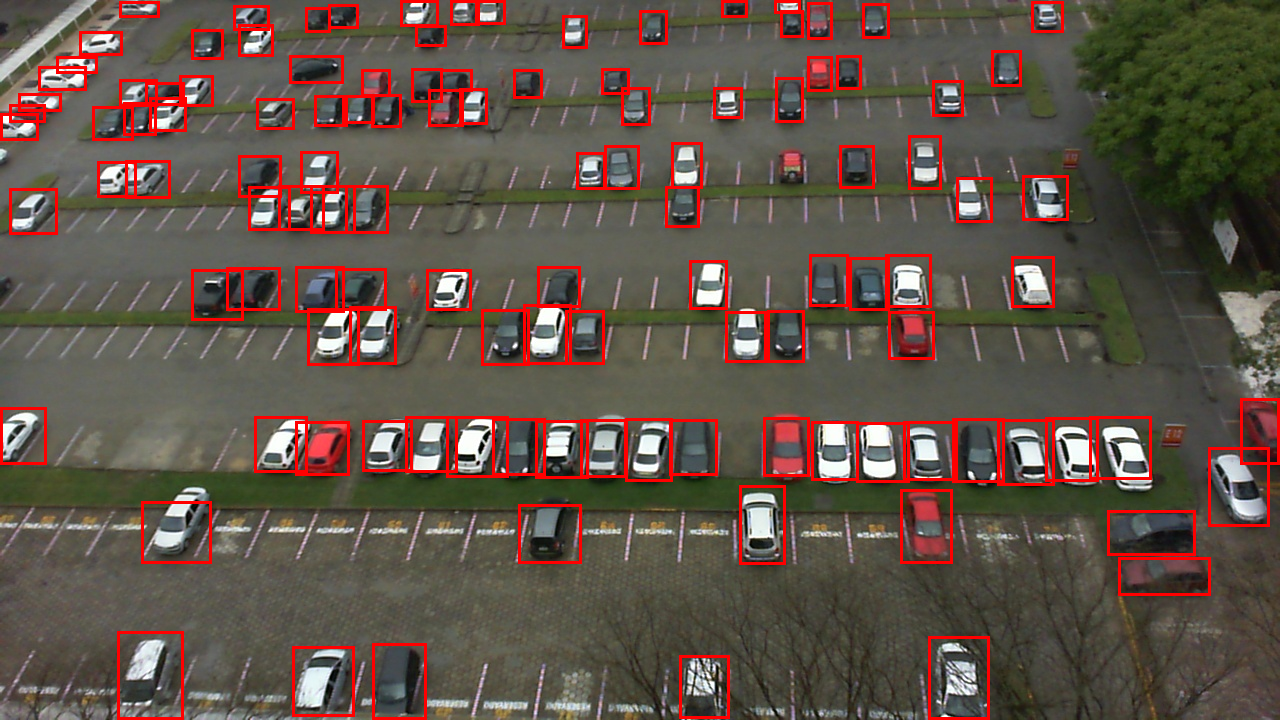

In [5]:
showgt(pucprdataset[0][0],pucprdataset[0][1]['boxes'])

In [6]:
resume_path = r'D:\ISO\pytorchmodel.pth'
checkpoint = torch.load(resume_path, map_location='cpu')
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
        num_classes=2, pretrained=False)
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [7]:
def evaulate(img):
    model.eval()
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    with torch.no_grad():
        prediction = model([img.to(device)])
    return prediction

In [8]:
def modelpredict(testdataset,index):
    predict = evaulate(testdataset[index][0])
    showgt(testdataset[index][0],predict[0]['boxes'])

In [9]:
modelpredict(pucprdataset,3)

RuntimeError: No such operator torchvision::nms

In [11]:
torch.onnx.export(model,args=x, f="carmodel.onnx", verbose=True)

c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\torch\tensor.py:410: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)


RuntimeError: No such operator torchvision::nms

In [25]:
carpklotdataset[0][0].size()

torch.Size([3, 720, 1280])

In [10]:
x = torch.cat((carpklotdataset[0][0],carpklotdataset[1][0]))
x.resize_(2, 3,720,1280)

tensor([[[[0.3255, 0.3294, 0.3294,  ..., 0.2196, 0.1412, 0.0941],
          [0.3255, 0.3255, 0.3333,  ..., 0.1882, 0.1333, 0.0980],
          [0.3176, 0.3255, 0.3255,  ..., 0.1882, 0.1608, 0.0941],
          ...,
          [0.4745, 0.5333, 0.4863,  ..., 0.1137, 0.2235, 0.1451],
          [0.5843, 0.5804, 0.5569,  ..., 0.1922, 0.2157, 0.1490],
          [0.5412, 0.5412, 0.5529,  ..., 0.2235, 0.2627, 0.1373]],

         [[0.3255, 0.3294, 0.3294,  ..., 0.3059, 0.2275, 0.1804],
          [0.3255, 0.3255, 0.3333,  ..., 0.2745, 0.2196, 0.1843],
          [0.3176, 0.3255, 0.3255,  ..., 0.2745, 0.2471, 0.1804],
          ...,
          [0.4706, 0.5412, 0.5216,  ..., 0.1412, 0.2471, 0.1686],
          [0.5804, 0.5922, 0.5961,  ..., 0.2196, 0.2392, 0.1765],
          [0.5529, 0.5608, 0.5922,  ..., 0.2510, 0.2863, 0.1608]],

         [[0.3255, 0.3294, 0.3294,  ..., 0.2275, 0.1490, 0.1020],
          [0.3255, 0.3255, 0.3333,  ..., 0.1922, 0.1412, 0.1020],
          [0.3176, 0.3255, 0.3255,  ..., 0